<a href="https://colab.research.google.com/github/raudh1/LorenzModel/blob/main/generate_trajectories/GenTrajMLPLorenz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from random import randint
import os
import sys
import string
#from torch import Dataset, Dataloader
from numpy import linalg as LA
from torchsummary import summary
from numpy.core.defchararray import asarray
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.offsetbox import AnchoredText
from sklearn.model_selection import train_test_split

In [2]:
from generate import *


device= cpu


In [3]:
from matplotlib import pyplot as plt

In [4]:
import torch.nn.functional as F


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Set files and directories

In [6]:
#DEFINE MLP
class Model(nn.Module):
  
    def __init__(self):
        super().__init__()
        self.lin1 = nn.Linear(3, 60, bias=True)
        self.lin2 = nn.Linear(60, 42, bias=True)
        self.lin3 = nn.Linear(42, 3, bias=True)

    def forward(self, xb):
        x = xb.contiguous().view(-1, 3)
        x = self.lin1(x)
        x = F.relu(x)
        x = self.lin2(x)
        x = F.relu(x)

        return self.lin3(x).view(-1,1,3)              # if you use 9 traj instead of 1 use 9 

    def predict(self,input,N):
      
      output=torch.zeros(N+input.shape[0],1,3)
      traj_pred= self.forward(input)

      
      output[:len(traj_pred)]=traj_pred
      inp=traj_pred[-1]

      for i in range(len(traj_pred),N+len(traj_pred)):
        inp=self.forward(inp)
        output[i]=inp

      return output


In [7]:
if __name__ == '__main__':

    # load data and make training set
    hidden   = 32
    layer    = 2
    features = 3
    dropout  = 0
    # build the model        
    ini = 25
case = 'FULL'


**TRAIN**

In [8]:
train_data, valid_data, test_data=load_data(case,2)
print(train_data.shape)


seq = Model().double().to(device)

torch.Size([10125, 1, 3])


In [30]:
t_loss,v_loss=train_MLP(seq,train_data, valid_data,lr=0.001,epoch=10000) # true 10,000 epochs

input shape= torch.Size([10125, 1, 3])  target shape = torch.Size([1687, 1, 3])
0 train loss 0.04610252916257417 valid loss 0.2998910064404424
50 train loss 0.04297749809338463 valid loss 0.03812702065825713
100 train loss 0.03902435751268447 valid loss 0.03371376360843592
150 train loss 0.03518379843658322 valid loss 0.030318837494350694
200 train loss 0.03195385917159646 valid loss 0.027435210047841434
250 train loss 0.029092213102732772 valid loss 0.024918015667912373
300 train loss 0.026591253452940476 valid loss 0.02272996057460408
350 train loss 0.02434137768367564 valid loss 0.02079594540364306
400 train loss 0.022289168066809154 valid loss 0.018999393689739918
450 train loss 0.020295177965946685 valid loss 0.017289609726238515
500 train loss 0.018628486662281753 valid loss 0.015850189940399842
550 train loss 0.017174268118758697 valid loss 0.014563393729583846
600 train loss 0.016299158202782073 valid loss 0.014098549435302147
650 train loss 0.014799848743315407 valid loss 0.01

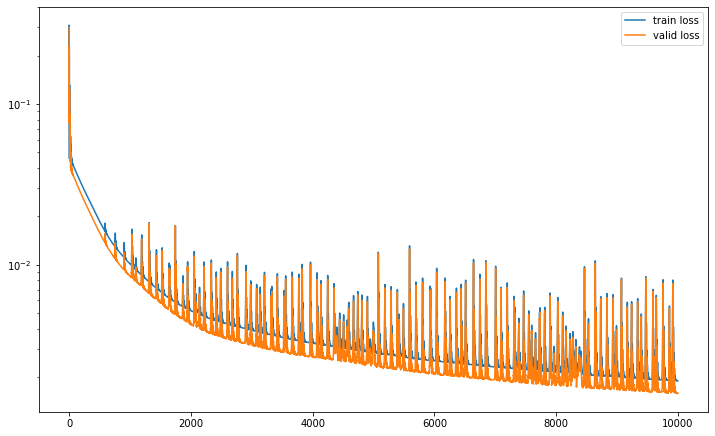

In [31]:
plt.figure(figsize=(12,7.45))
plt.plot(t_loss[:],label='train loss')
plt.plot(v_loss[:],label='valid loss')
#plt.xlim(len(t_loss)-100,len(t_loss))
plt.semilogy()
plt.legend()
plt.show()



In [32]:
mdl = Model()
mdl.load_state_dict(torch.load('./param'))

<All keys matched successfully>

In [33]:
input = test_data
input.shape

torch.Size([1687, 1, 3])

In [34]:
history=100
future=500
traj_1step, traj=generate_MLPtraj(seq,input,history,future)


**PLOT**

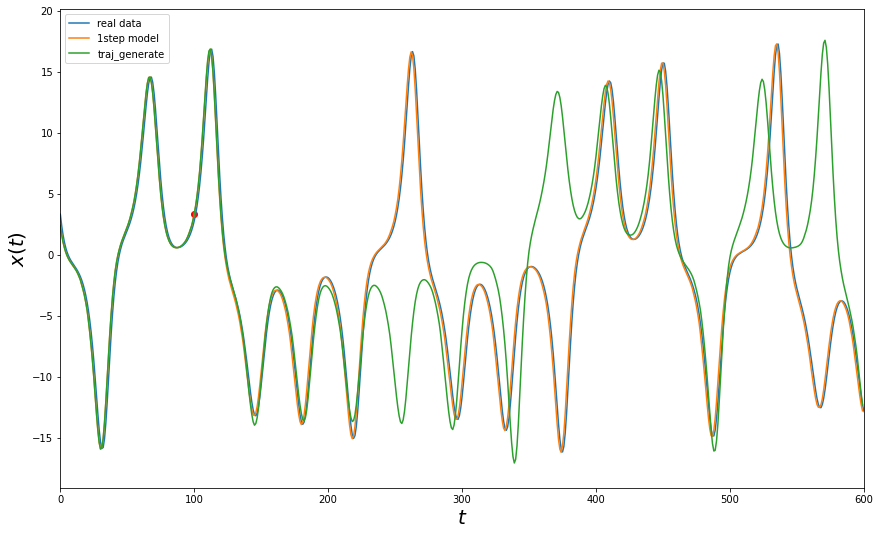

In [35]:
plot_traj(traj_1step=traj_1step,traj=traj,inp=input,
          h=history,coordinate='x',data=True,error=False)

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/proj3d.py:189: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  return np.array([xs, ys, zs, np.ones_like(xs)])
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/proj3d.py:189: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([xs, ys, zs, np.ones_like(xs)])


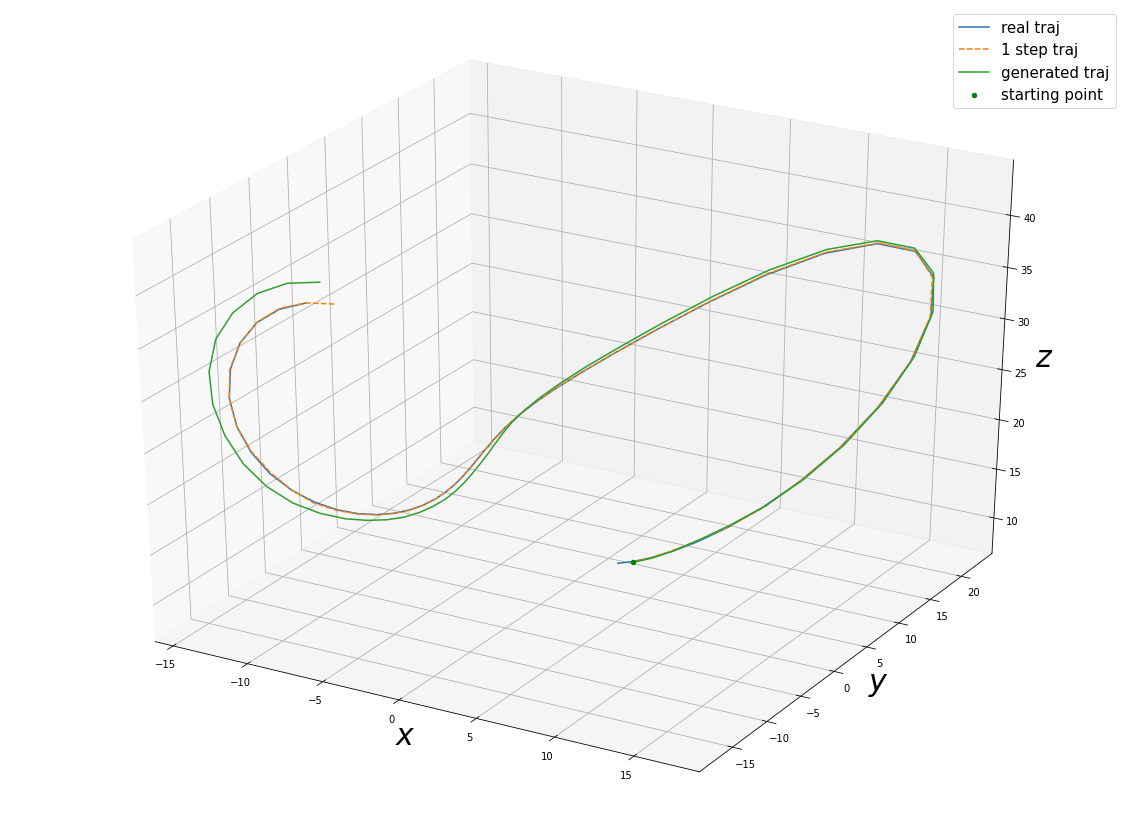

In [36]:
plot_traj_3D(traj,traj_1step,inp=input,h=history,f=50,data=True)

In [37]:
traj_1step_best, traj_best =generate_MLPtraj(mdl,input,history,future)


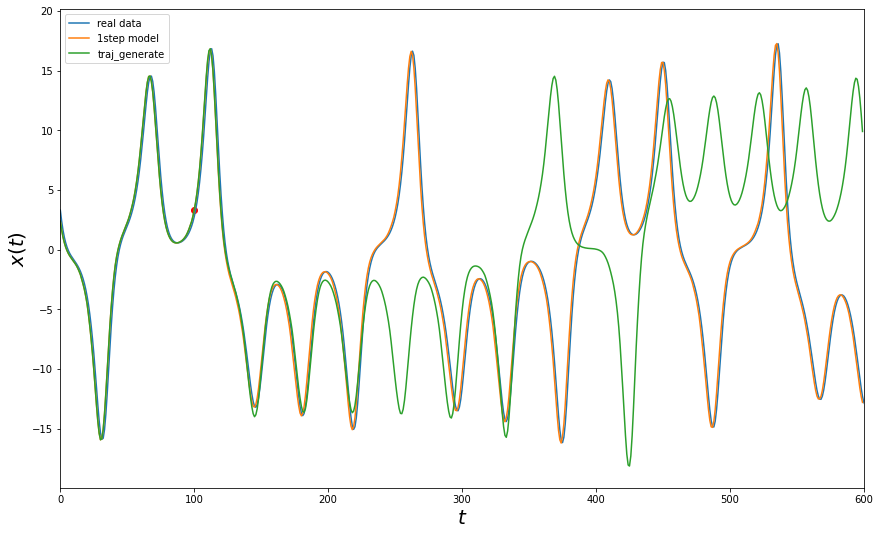

In [38]:
plot_traj(traj_1step=traj_1step_best,traj=traj_best,inp=input,
          h=history,coordinate='x',data=True,error=False)

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/proj3d.py:189: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  return np.array([xs, ys, zs, np.ones_like(xs)])
/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/proj3d.py:189: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([xs, ys, zs, np.ones_like(xs)])


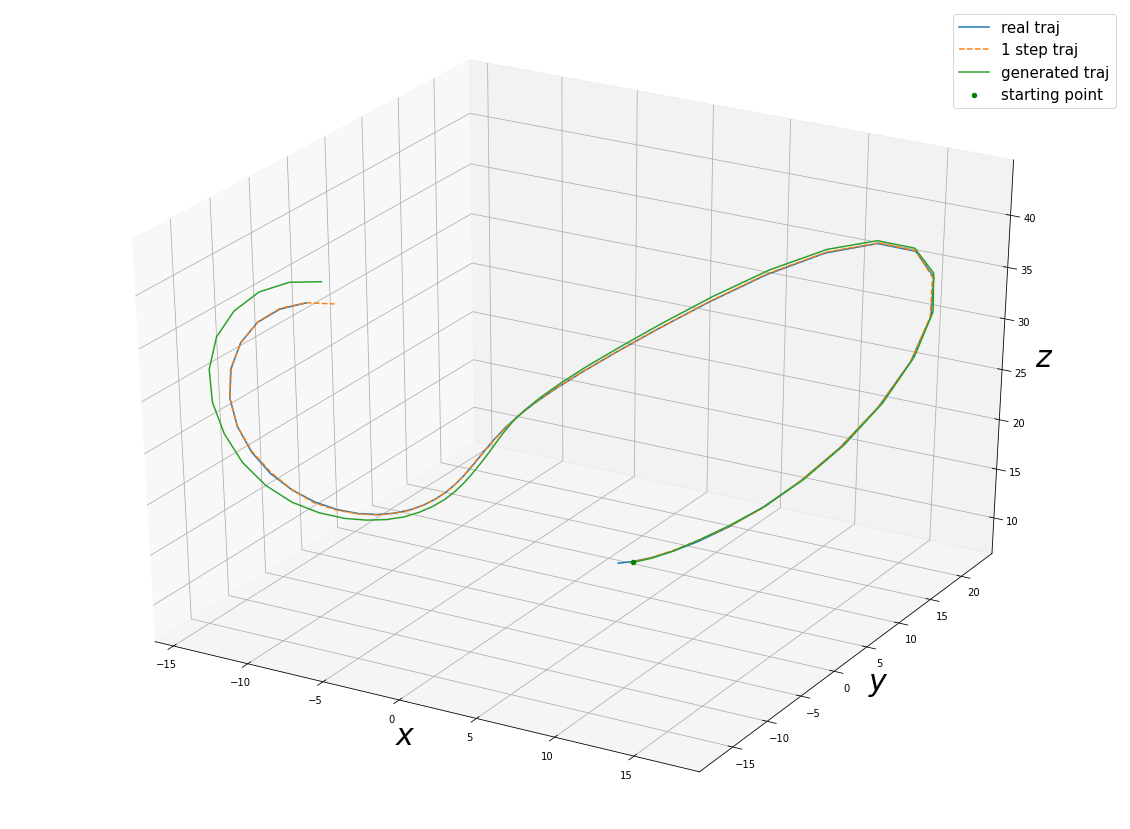

In [39]:
plot_traj_3D(traj_best,traj_1step_best,inp=input,h=history,f=50,data=True)